# Análisis de biodiversidad automatizado
    Este cuaderno de Jupyter de contiene el flujo de trabajo automatizado para la visualización de los datos de la composición de una comunidad microbiana para la metabarcodificación usando amplicones. 
    
    En esta sección se encuentra el llamado de las funciones creadas en el el arivho "fuctions.r". Además, se detallan las instrucciones para la obtención de graficos de análisis de diversidad.

## Requisitos a tener en cuenta: 
    Identificar la la ruta o dirección de la caperta que contiene a los siguentes archivos:
        Tabla de metadatos
        Tabla de taxonomía
        Tabla de conteos de OTUs/ASVs/TaxID
        
    Identificar la la ruta o dirección de la caperta que contiene a los siguentes archivos:
        Script de R que contenga las Funciones requeridas (functions.r)
        Script de jupyter que contenga el llamado de las funciones (este archivo)
    

In [2]:
#opción 1

In [3]:
#current_path <- getwd()
#file_path <- file.path(current_path)
#source(file.path(file_path, "only_functions.r")) #lee un archvio de otro script de R en el script actual

In [4]:
#opción 2

Primero conoceremos la ruta en la cual no encontramos ubicados. Usando la función de R getwd()

In [1]:
getwd()

[1] "C:/Users/51982/Desktop/23S_test/code"

Luego, se llamará al script de R que contiene las funciones (.r)

In [2]:
source('C:/Users/51982/Desktop/23S_test/code/functions.r')#Cambiar la ruta por la ruta que contiene al arichivo funtions.r


Con la función "load_packages" se cargarán los paquetes a usar en esa sección:
- tidyverse
- phyloseq
- DESeq2
- dendextend
- viridis
- ampvis2
- data.table
    

In [4]:
load_packages()

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

In [4]:
#Cambiar direcciones de acuerdo a la dirección donde se situan tus arichivos: direccion/de/la/metadatadaoral/formato/.csv

In [5]:
sample_info_tab <- load_sample_info_tab("C:/Users/51982/Desktop/23S_test/files/metadata_pantanos.csv")

In [6]:
head(sample_info_tab)

,CODE,TYPE,COLOUR,color
,<chr>,<chr>,<chr>,<chr>
PAN1A,P1A,ZONE1,#FFC0CB,#FFC0CB
PAN1B,P1B,ZONE1,#FFC0CB,#FFC0CB
PAN1C,P1C,ZONE1,#FFC0CB,#FFC0CB
PAN2A,P2A,ZONE2,#00FF00,#00FF00
PAN2B,P2B,ZONE2,#00FF00,#00FF00
PAN2C,P2C,ZONE2,#00FF00,#00FF00


In [119]:
#Cambiar direcciones de acuerdo a la dirección donde se situan tus arichivos: direccion/de/la/tabla/de/conteo/formato/.tsv

In [12]:
count_tab <- load_count_tab("C:/Users/51982/Desktop/23S_test/files/ASVs_clean.tsv")

In [13]:
head(count_tab)

,PAN1A,PAN1B,PAN1C,PAN2A,PAN2B,PAN2C,PAN3A,PAN3B,PAN3C,PAN4A,PAN4B,PAN4C,PAN5A,PAN5B,PAN5C
ASV_6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ASV_11,340,435,1541,0,536,671,185,313,241,491,1035,549,389,395,208
ASV_13,0,0,2067,0,0,0,2729,4199,0,0,0,0,0,0,0
ASV_21,0,0,1327,0,0,0,811,0,25,1655,473,337,140,147,198
ASV_22,0,0,0,4764,0,0,0,0,0,0,0,0,0,0,0
ASV_25,65,35,783,0,0,77,0,0,0,479,229,2219,0,159,107


In [5]:
#Cambiar direcciones de acuerdo a la dirección donde se situan tus arichivos: direccion/de/la/tabla/de/taxonomia/formato/.tsv

In [14]:
tax_tab <- load_tax_tab("C:/Users/51982/Desktop/23S_test/files/ASVs_taxonomy.tsv")

In [15]:
head(tax_tab)

,Kingdom,Phylum,Class,Order,Family,Genus,Species
ASV_6,Eubacteria,Cyanobacteria,Cyanophyceae,Synechococcales,Synechococcaceae,Cyanobium,NA
ASV_11,Eubacteria,Cyanobacteria,Cyanophyceae,NA,NA,NA,NA
ASV_13,Chromista,Cryptophyta,Cryptophyceae,Pyrenomonadales,Geminigeraceae,Guillardia,NA
ASV_21,Chromista,Bacillariophyta,Mediophyceae,Stephanodiscales,Stephanodiscaceae,Cyclotella,sp.
ASV_22,Chromista,Cryptophyta,Cryptophyceae,Pyrenomonadales,Geminigeraceae,Guillardia,NA
ASV_25,Chromista,Bacillariophyta,Mediophyceae,Stephanodiscales,Stephanodiscaceae,Cyclotella,NA


In [35]:
#count_tab <- subset(count_tab, select = -P8PANBLANCO)

In [18]:
#count_tab

In [16]:
vst_trans_count_tab <- automate_deseq(count_tab, sample_info_tab)

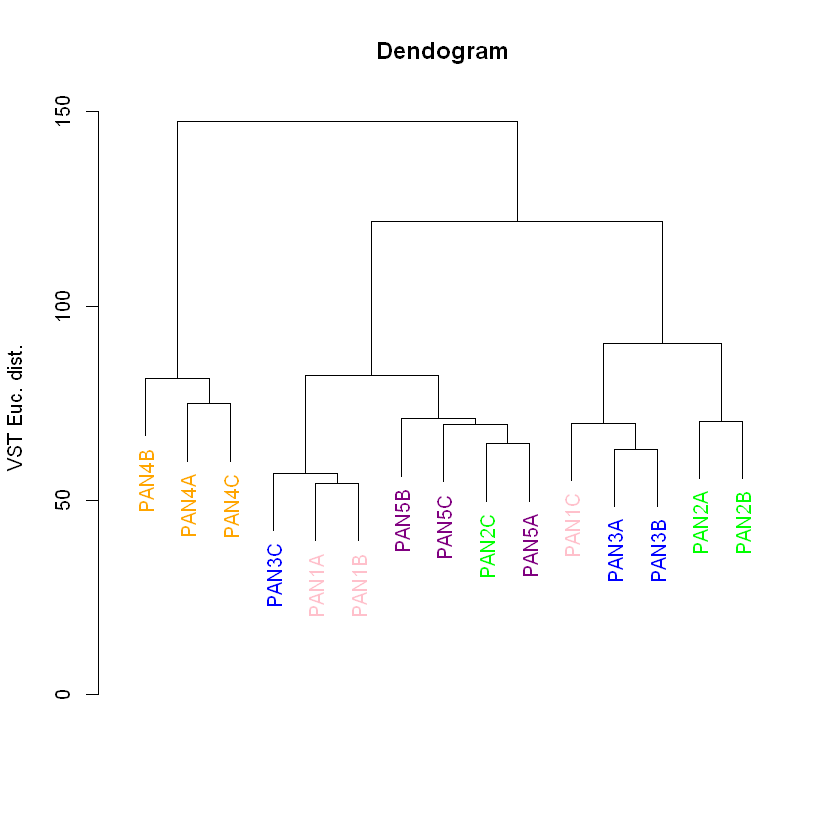

In [17]:
plot_dendogram <- create_dendrogram(vst_trans_count_tab, sample_info_tab)

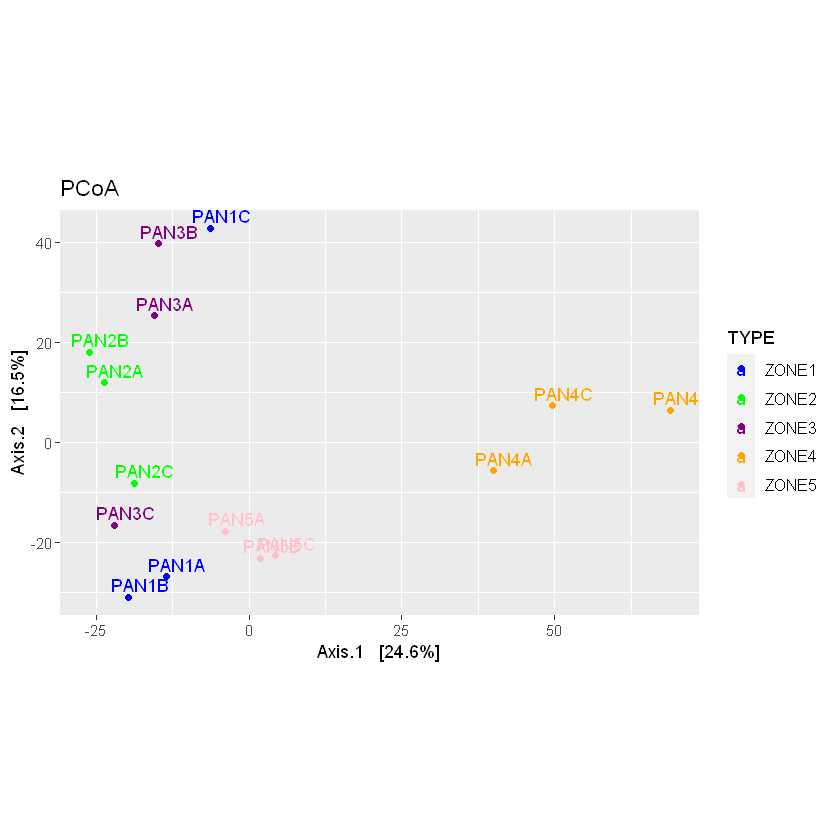

In [19]:
pcoa_plot <- perform_pcoa(vst_trans_count_tab, sample_info_tab)
pcoa_plot

Warning message in estimate_richness(physeq, split = TRUE, measures = measures):
"The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry."


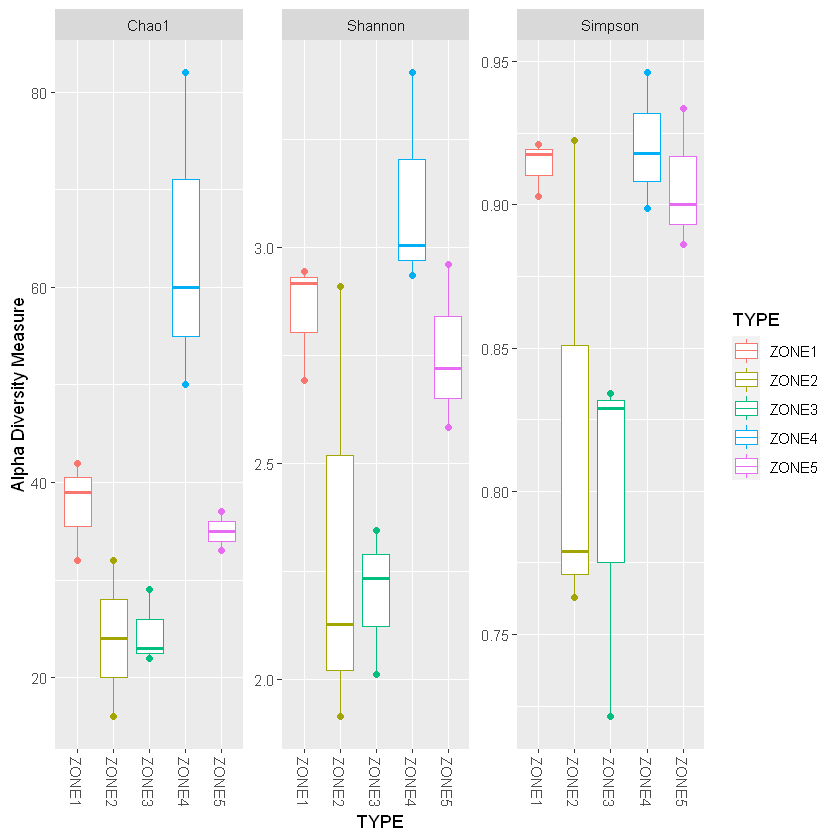

In [20]:
richness_plot <- calculate_richness(count_tab, tax_tab, sample_info_tab)
richness_plot

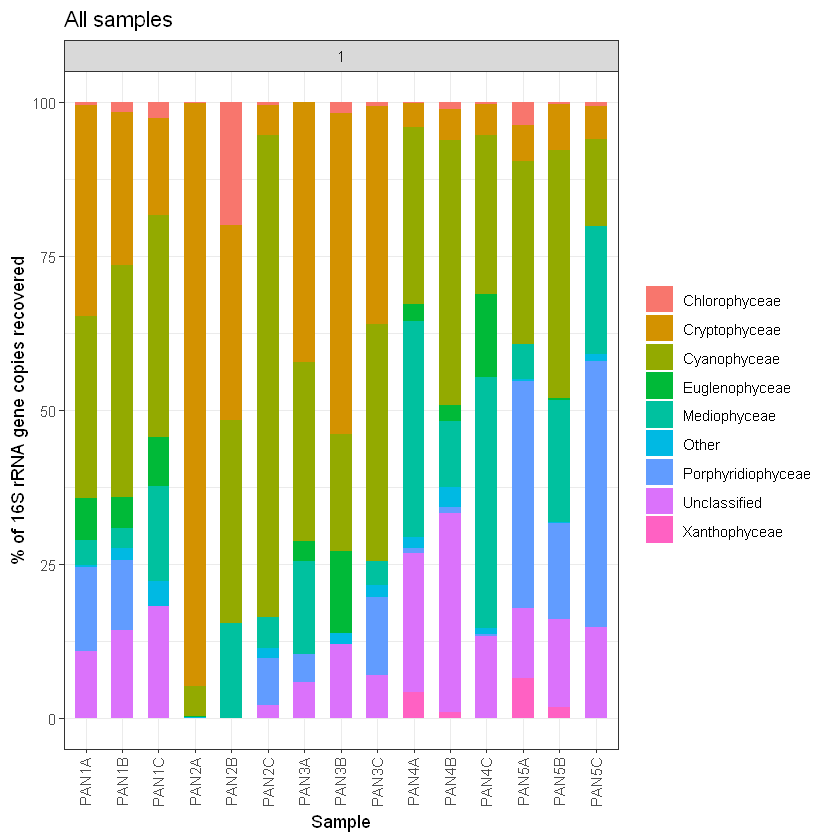

In [27]:
my_stack_plot <- create_stack_plot(count_tab, tax_tab, sample_info_tab, taxrank="Class", threshold=5)
my_stack_plot

In [32]:
heatmap <- heatmap_function(count_tab, tax_tab, sample_info_tab,
                           group_by = "CODE", 
                           facet_by = "TYPE", 
                           tax_aggregate = "Class",
                           tax_add = "Kingdom",
                           plot_colorscale = "sqrt",
                           plot_legendbreaks = c(1, 10, 30, 60))

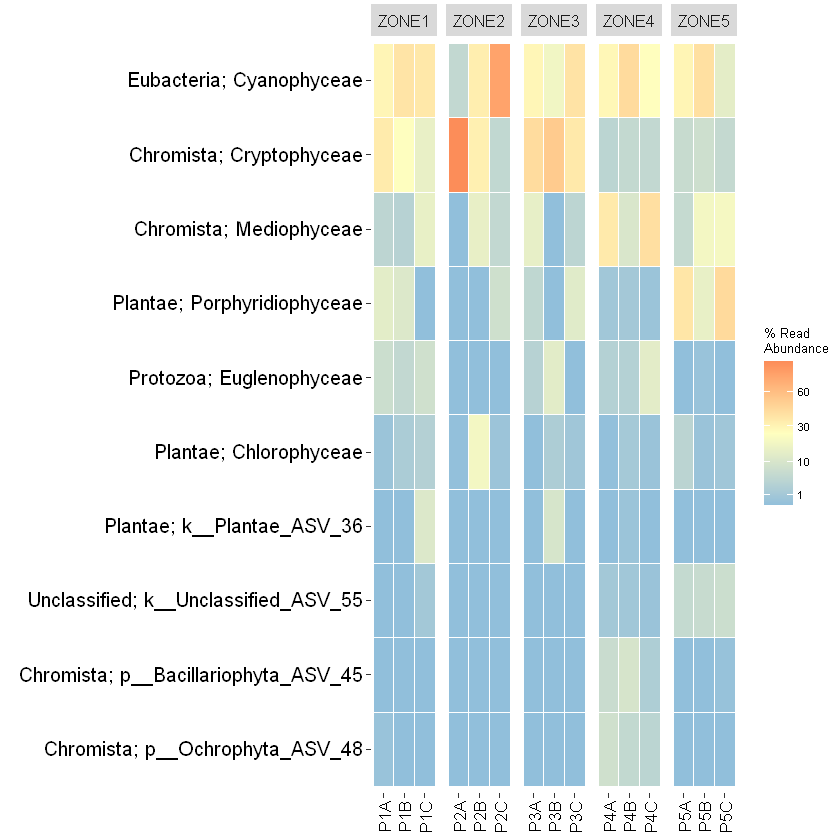

In [33]:
heatmap